In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from SedCas import SedCas

import os 

%matplotlib inline

## model run itself 

In [15]:
"""
Created on Thu Feb  3 16:56:57 2022

@author: hirschbe
"""

# from SedCas import SedCas
# 
# model = SedCas()
# model.load_climate()
# model.load_params()
# model.run_hydro()
# model.run_sediment()
# model.save_output()
# model.plot_sedyield_monthly()

# Qstl = potential sediment catchment output [mm], i.e. transport-limited case

'\nCreated on Thu Feb  3 16:56:57 2022\n\n@author: hirschbe\n'

## data from "looped" runs, plot monthly sediment yeld transporten in a form of DF 

In [16]:
# data
westhimal = pd.read_csv('timeseries/1_Western_Himalaya/Sediment.out', index_col = 0)


In [18]:
# 
## change unite: 
sediments = westhimal

# get area from parameters files: 
area = 4.83
cf = (area*10**6) * 10**-3   # km2 to m2 and mm to m

# qstl_area = pd.DataFrame(data = sedimentout.Qstl*cf, index=pd.to_datetime(sedimentout.index))
sediments_area = pd.DataFrame()
sediments_area['Qstl']  = sediments.Qstl *cf
sediments_area['Qdftl'] = sediments.Qdftl*cf

# qstl_area.set_index('D')
sediments_area.index = pd.to_datetime(sediments_area.index)


# monthly sediment yeild
sym = sediments_area.resample('m').sum()                         # sediment yeld month 
symm_westernhimal = sym.groupby(by=sym.index.month).mean()  # sediment yeld month mean 

symm_westernhimal = symm_westernhimal.reset_index()

In [19]:
df = symm_westernhimal

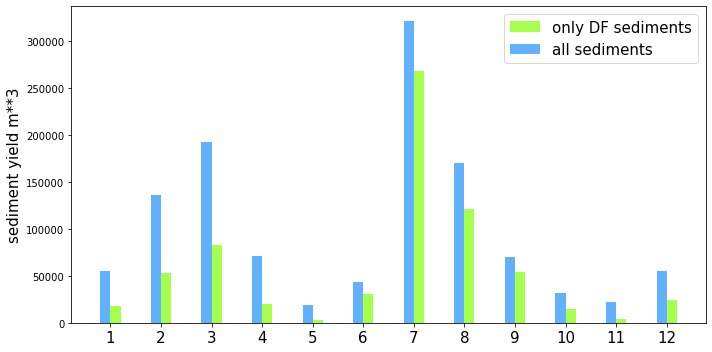

In [12]:
## figure to count all lakes

fig, ax = plt.subplots(figsize=(10, 5))

width = 0.2
ax.bar(x=df.D+0.1, height=df.Qdftl, width=width, label='only DF sediments',  alpha=0.7, color='chartreuse')
ax.bar(x=df.D-0.1,     height=df.Qstl, width=width,label='all sediments' , alpha=0.7, color= 'dodgerblue')

ax.set_xticks(df.D)
ax.set_xticklabels(df.D, fontsize=15)#rotation=45)
ax.legend(fontsize=15, )
ax.set_ylabel('sediment yield m**3', fontsize=15)
fig.tight_layout()

# fig.savefig('sed_yeld_3regions.pdf', bbox_inches='tight')

## magnitude frequency 

In [22]:
sediments_area.head()

,Qstl,Qdftl
D,,
1980-01-01 00:00:00,0.000000,0.0
1980-01-01 01:00:00,0.000000,0.0
1980-01-01 02:00:00,1107.737730,0.0
1980-01-01 03:00:00,1821.591262,0.0
1980-01-01 04:00:00,1756.875825,0.0


# plots: 

(array([3.41821e+05, 2.40000e+01, 1.90000e+01, 8.00000e+00, 3.00000e+00,
        1.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.        ,  122634.96987439,  245269.93974878,
         367904.90962317,  490539.87949756,  613174.84937194,
         735809.81924633,  858444.78912072,  981079.75899511,
        1103714.7288695 , 1226349.69874389]),
 <BarContainer object of 10 artists>)

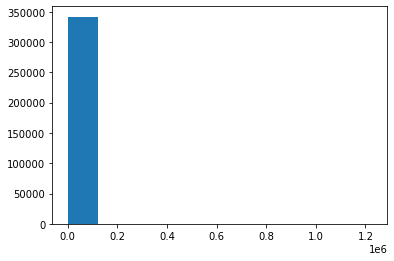

In [37]:
total = sediments_area.Qstl
dfs = sediments_area.Qdftl

plt.hist(dfs, bins = 10)

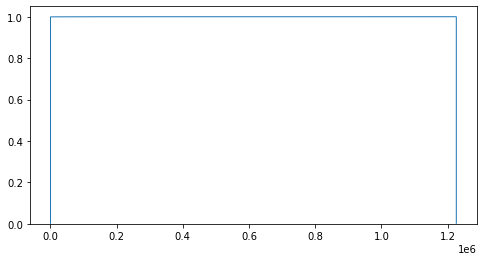

In [48]:
# plot the cumulative histogram

fig, ax = plt.subplots(figsize=(8, 4))
n_bins = 1000
n, bins, patches = ax.hist(dfs, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

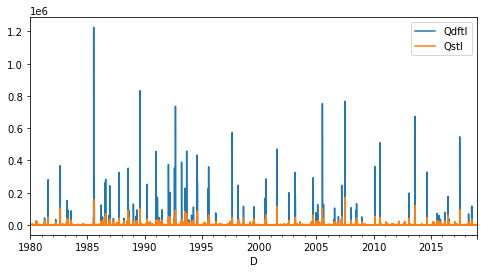

In [55]:

fig, ax = plt.subplots(figsize=(8, 4))
sediments_area.Qdftl.plot(label = 'Qdftl')
sediments_area.Qstl.plot(label = 'Qstl')

plt.legend()

## magnitude frequency 